<a href="https://colab.research.google.com/github/MittalSneha/AI-Disaccharide-Isomers-Identification/blob/main/AI_Disaccharide_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

# **Feature Generation**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_excel('test.xlsx')
# Calculate the required statistical values
T_max = df['T'].max()
T_min = df['T'].min()
T_mean = df['T'].mean()
T_hmean = stats.hmean(df['T'])
T_std = df['T'].std()
T_kurtosis = stats.kurtosis(df['T'])

# Create new columns for each calculation
df['MAX'] = df['T'] / T_max
df['MIN'] = df['T'] / T_min
df['AVG'] = df['T'] / T_mean
df['HMAVG'] = df['T'] / T_hmean
df['STD'] = df['T'] / T_std
df['KURT'] = df['T'] / T_kurtosis

df.to_excel('featured_data.xlsx')

In [ ]:
import pandas as pd
x_train = pd.read_excel('x_train.xlsx')
x_test = pd.read_excel('x_test.xlsx')
y_train = pd.read_excel('y_train.xlsx')
y_test = pd.read_excel('y_test.xlsx')
x_val = pd.read_excel('x_val.xlsx')
y_val = pd.read_excel('y_val.xlsx')

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
XGBC = XGBClassifier(subsample= 1, objective= 'multi:softmax', num_class= 3, n_estimators= 50, min_child_weight= 1, max_depth= 6, learning_rate= 0.3, gamma= 0, colsample_bytree= 0.7)
XGBC.fit(x_train, y_train)
XGBC_pred = XGBC.predict(x_test)
XGBC_acc = accuracy_score(y_test, XGBC_pred)
XGBC_acc

0.99

In [ ]:
XGBC_pred1 = XGBC.predict(x_train)
XGBC_acc1 = accuracy_score(y_train, XGBC_pred1)
XGBC_acc1

0.9978125

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, XGBC_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       1.00      0.96      0.98        45
           2       0.96      1.00      0.98        46
           3       0.98      1.00      0.99        50
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        61
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        46

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
XGBC_val = XGBC.predict(x_val)
Accuracy = accuracy_score(y_val, XGBC_val)
Accuracy

0.9925

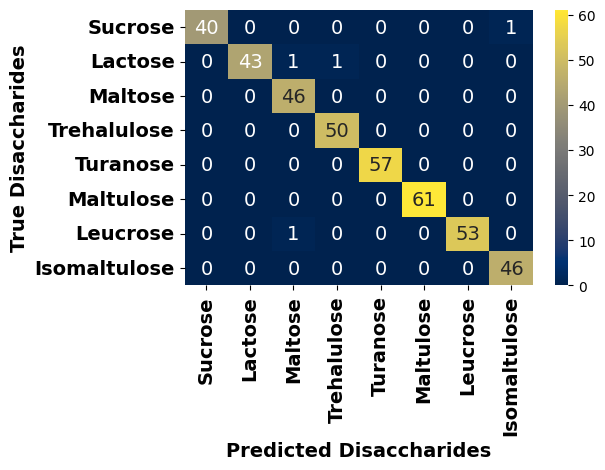

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
cm = confusion_matrix(y_test, XGBC_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Sucrose','Lactose','Maltose','Trehalulose', 'Turanose', 'Maltulose','Leucrose', 'Isomaltulose'],
                     columns = ['Sucrose','Lactose','Maltose','Trehalulose', 'Turanose', 'Maltulose','Leucrose', 'Isomaltulose'] )

sns.heatmap(cm_df, cbar=True,annot=True,cmap="cividis",fmt="d",annot_kws={"size": 14})
plt.ylabel('True Disaccharides', fontsize = 14,weight='bold')
plt.xlabel('Predicted Disaccharides', fontsize = 14,weight='bold')
#plt.title('Confusion Matrix', fontsize = 15,weight='bold')
plt.xticks(weight='bold', fontsize = 14)
plt.yticks(weight='bold', fontsize = 14)
plt.tight_layout()
plt.savefig('confusion_matrix.jpg', format='jpg')